In [2]:
# Standard Library
import datetime
import os
from pathlib import Path

# Third Party Library
import joblib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from scipy.stats import rankdata
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler

# First Party Library
from src.visualization.plot import (
    image_concat_and_imshow,
    scatter_each_classes,
)


In [8]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
markers = ['s', 'D', 'o', 'p', '*', 'h', 'D', '8', 'v', 'x']

model_name = "SimpleCAE64"
trained_datetime = "2023-07-21/20-18-22"

project_dir = Path("/home/shinsei/MyResearches/feat_extrc")

model_save_pardir = project_dir / "models" / "VBGMM"
feature_pardir = project_dir / "reports" / "features" / model_name / trained_datetime
figure_pardir = project_dir / "reports" / "figures" / "VBGMM" / trained_datetime
image_pardir = project_dir / "data/processed/CNTForest/cnt_sem_16x16/10k/"


# feature_csv_path = "/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCAE32/2023-07-07/12-15-24/features.csv"
feature_train_csv_path = feature_pardir / "features_train_data.csv"
feature_check_csv_path = feature_pardir / "features_check_data.csv"


In [9]:
df_train = pl.read_csv(feature_train_csv_path)
X_train = df_train.select([
    pl.exclude(["filename", "dirname"])
]).to_numpy()
df_train.head()


column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_93,column_94,column_95,column_96,column_97,column_98,column_99,column_100,column_101,column_102,column_103,column_104,column_105,column_106,column_107,column_108,column_109,column_110,column_111,column_112,column_113,column_114,column_115,column_116,column_117,column_118,column_119,column_120,column_121,column_122,column_123,column_124,column_125,column_126,column_127,dirname,filename
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str
-0.480689,-0.250957,0.134303,0.527506,-0.188884,0.596581,0.293731,-0.678656,0.461142,-0.66485,0.049181,-0.237887,-0.163372,0.38375,-0.169566,0.414026,-0.169382,0.45239,-0.313963,-0.396345,0.096606,0.187677,0.33973,-0.548173,0.116165,0.302754,-0.2207,-0.428371,0.500092,0.685028,0.162909,0.23601,-0.505956,0.701979,0.072648,0.059644,-0.160891,…,0.262386,-0.59855,0.430318,0.187079,-0.09002,-0.051904,0.461747,0.323573,-0.383507,0.085198,0.25725,0.416034,0.790253,0.357602,0.612576,-0.786406,-0.146629,0.519919,0.453502,0.296894,0.014443,0.198261,0.425688,1.023964,0.303057,0.579809,-0.606624,0.309347,0.079742,0.229817,-0.133698,0.192402,-0.564864,0.265325,-0.283846,0,"""10k_0_h000_w00…"
0.638165,0.384977,-0.373115,0.011833,-0.368707,0.217144,-0.600363,0.625115,0.010921,0.508958,0.848642,-0.410738,-0.096334,0.394573,0.05495,-0.369422,0.218468,0.265118,-0.32765,-0.072592,0.687571,0.002601,0.486916,-0.319724,0.308216,-0.498162,-0.274745,-0.460246,-0.409331,0.875359,-0.243196,0.628016,-0.461871,-0.260614,-0.77319,0.410366,0.108203,…,0.137889,0.168324,0.210535,-0.482988,-0.64546,-0.149561,0.741864,0.041152,0.811563,0.104205,0.33884,-0.650709,0.016865,-0.356683,0.213863,-0.265035,0.205076,0.100726,0.335885,0.053967,0.236031,0.680872,1.075181,-0.181282,0.431672,0.319205,-0.184819,0.015134,0.784079,0.333607,-0.374861,0.089107,-0.376194,0.08289,-0.149687,0,"""10k_0_h000_w00…"
-0.087902,0.078338,-0.464649,0.161018,0.110725,-0.153255,-0.184703,0.901814,0.340949,0.305526,0.785828,0.216867,0.383388,-0.569138,-0.729844,0.609402,0.356138,-0.251733,-0.030512,0.894995,0.22148,0.396075,0.109834,0.049447,0.679133,-0.223651,0.13787,-0.572647,-0.316005,1.231044,0.506716,-0.219661,0.334575,-0.631072,0.75332,0.427674,0.183404,…,0.910671,0.249802,-0.270236,0.282377,-0.295861,-0.251252,0.044358,0.223102,0.301496,-0.318485,0.198336,0.247354,0.356386,0.178829,0.095892,0.206547,-0.263223,-0.5303,0.254118,0.140214,-0.74762,0.218173,0.904426,0.405346,-0.512755,-0.289054,-0.219256,-0.354087,0.064414,0.205656,0.070801,0.034701,-0.36685,-0.574706,0.190738,0,"""10k_0_h000_w00…"
-0.599841,0.567699,-0.753484,-0.091371,0.120775,0.544317,0.14641,0.873999,0.429131,0.233793,-0.206678,0.013771,0.915503,-0.075589,-0.261182,0.564146,-0.19335,0.827752,0.016769,-0.33436,0.420257,-0.466157,-0.373667,-0.083488,-0.547581,-0.448676,-0.244846,0.272659,-0.735725,0.476931,-0.580758,-0.241118,-0.264272,0.629078,1.168597,0.143719,-0.072026,…,0.428236,0.181979,-0.013249,-0.491812,-0.310987,0.55847,-0.39631,0.745545,0.128477,0.473604,0.153816,0.308751,0.177787,0.016041,0.527497,-0.261613,-0.049037,0.593026,-0.16437,0.528972,0.220581,0.237054,0.761552,-0.228225,0.26677,0.063875,0.238014,0.004238,-0.237343,0.189757,0.140178,0.386975,-0.166745,0.534221,0.403552,0,"""10k_0_h000_w00…"
0.343487,-0.217676,-0.019836,0.171915,-0.299715,0.697427,-0.814731,0.483844,0.975411,-0.273624,0.562955,0.420344,0.247794,-0.336627,0.179576,0.350196,0.634973,0.250527,0.191267,0

In [10]:
df_check = pl.read_csv(feature_check_csv_path)
X_check = df_check.select([
    pl.exclude(["filename", "dirname"])
]).to_numpy()
df_check.head()


column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_93,column_94,column_95,column_96,column_97,column_98,column_99,column_100,column_101,column_102,column_103,column_104,column_105,column_106,column_107,column_108,column_109,column_110,column_111,column_112,column_113,column_114,column_115,column_116,column_117,column_118,column_119,column_120,column_121,column_122,column_123,column_124,column_125,column_126,column_127,dirname,filename
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str
-0.482062,-0.253698,0.131308,0.522162,-0.169658,0.599281,0.28677,-0.675058,0.447991,-0.664716,0.048876,-0.247031,-0.200176,0.364599,-0.161072,0.407131,-0.155931,0.448036,-0.319345,-0.389447,0.089619,0.193162,0.33739,-0.542575,0.111495,0.300172,-0.203429,-0.428165,0.502537,0.681071,0.16589,0.246683,-0.513741,0.710366,0.086487,0.066834,-0.156398,…,0.250118,-0.600644,0.412294,0.195724,-0.119491,-0.023231,0.44369,0.326146,-0.368163,0.088464,0.251958,0.389333,0.792006,0.351554,0.608975,-0.785796,-0.149907,0.509553,0.458326,0.301381,0.018558,0.201157,0.430413,1.022744,0.310301,0.57025,-0.605116,0.313987,0.074878,0.232002,-0.13542,0.191828,-0.558056,0.273989,-0.281635,0,"""10k_0_h000_w00…"
0.34002,-0.216421,-0.016797,0.169458,-0.288447,0.696903,-0.817507,0.489113,0.95818,-0.277182,0.563842,0.412038,0.221808,-0.357853,0.187115,0.339764,0.638747,0.24505,0.184954,0.22011,-0.658256,0.374547,0.341392,-0.395067,0.033643,0.110626,-0.388588,0.253229,-0.408355,0.545967,-0.1555,-0.026877,0.265633,-0.500654,0.335361,0.645082,0.172375,…,-0.808169,-0.560216,0.1138,0.09014,0.224644,-0.025925,-0.172312,-0.517291,0.408747,0.421108,-0.820618,0.000181,0.026342,-0.192447,0.85647,0.061274,0.046113,0.346609,0.460517,0.305999,0.330515,-0.389321,0.192947,-0.377328,0.249289,-0.242942,0.298253,-0.281839,-0.108079,0.353893,-0.554069,0.383118,-0.314815,0.355418,-0.201515,0,"""10k_0_h000_w00…"
-0.635149,0.211293,0.471909,0.079925,0.240078,0.068187,0.307456,-0.185565,0.276642,-0.677429,0.178475,-0.178528,0.311999,-0.494818,0.173077,0.09113,0.468932,0.399053,0.143717,0.716484,-0.45209,0.358637,0.135649,0.154757,-0.413563,0.758386,0.023913,0.506491,0.538476,-0.455251,0.068825,-0.439277,0.339463,0.07965,-0.688657,-0.091851,-0.126471,…,0.203394,-0.363613,0.071631,-0.303067,-0.420517,0.436623,-0.020849,0.27907,0.353339,-0.50694,0.235962,0.207748,-0.166646,0.038437,-0.563132,-0.00916,0.387791,-0.751728,0.221542,0.244329,0.237155,-0.152574,0.388858,-0.063613,-0.270509,-0.074133,-0.117389,-0.566634,0.447177,0.426137,0.033997,0.333943,0.184823,0.681192,0.161617,0,"""10k_0_h000_w01…"
0.417461,-0.617649,-0.103198,0.604243,0.202766,0.109728,0.094961,0.421465,0.3338,0.319978,0.033944,0.202205,0.27163,-0.214677,0.540353,-0.357516,0.121213,0.453164,-0.757624,0.141044,0.344297,0.480959,0.532729,-0.489985,0.351992,1.089151,0.215939,-0.348583,-0.464717,-0.459661,0.52482,-0.367184,-0.55557,0.329693,0.296618,-0.078319,0.121476,…,-0.020663,0.471244,-0.700302,-0.332493,0.330757,-0.457116,0.989629,-0.064807,-0.749761,0.008479,-0.844275,-0.606228,-0.11616,0.284553,0.723649,0.71811,-0.865603,0.724479,0.189342,0.569807,0.033729,-0.535809,-0.338785,0.008603,0.27616,0.42382,-0.071297,0.37473,0.654488,-0.254485,-0.844227,-0.178621,-0.01782,0.52527,-0.59271,0,"""10k_0_h000_w01…"
0.63671,0.229387,0.055386,-0.218297,0.232986,0.907513,-0.424784,-0.317054,-0.507825,-0.059109,-0.465965,-0.859561,-0.502004,-0.489794,0.22779,0.151489,0.188907,-0.454965,0.317379,-0

In [11]:
sc = StandardScaler()
pca = PCA()

X_train_std = sc.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_std)

X_check_std = sc.transform(X_check)
X_check_pca = pca.transform(X_check_std)


41


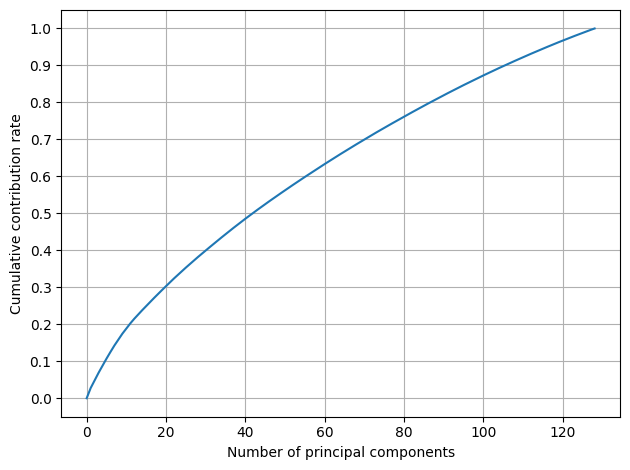

In [12]:
cumsum_contrb_rate = pca.explained_variance_ratio_.cumsum()
num_use_features = cumsum_contrb_rate[cumsum_contrb_rate < 0.5].shape[0]
print(num_use_features)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(X_train.shape[1]+1), [0]+list(cumsum_contrb_rate))
ax.set_xlabel('Number of principal components')
ax.set_ylabel('Cumulative contribution rate')
ax.set_yticks(np.arange(0., 1.1, 0.1))
ax.grid()
fig.tight_layout()
plt.show()


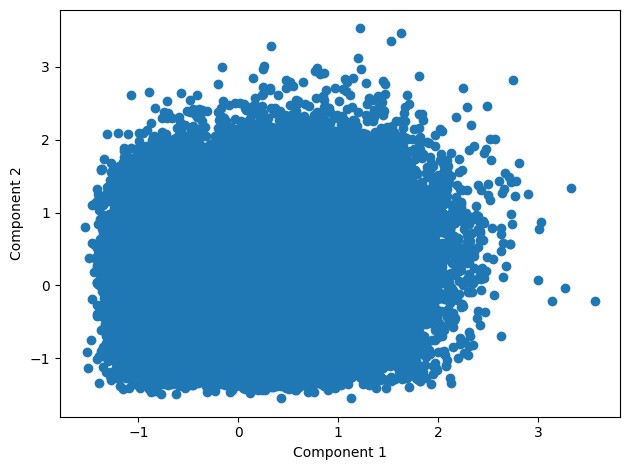

In [8]:
component_01 = df_train.select([pl.col("column_0"), pl.col("column_1")]).to_numpy()
plt.scatter(component_01[:, 0], component_01[:, 1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()


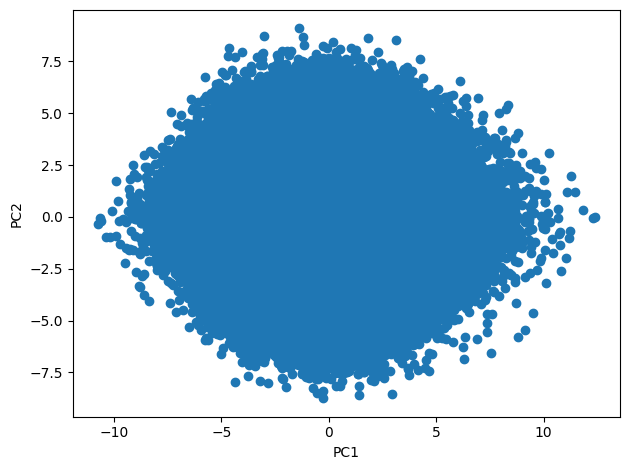

In [7]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()


In [9]:
model_save_dir = model_save_pardir / trained_datetime
model_save_dir


PosixPath('/home/shinsei/MyResearches/feat_extrc/models/VBGMM/2023-11-27/12-07-16')

vbgmm_pca_24_20clusters
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
  Iteration 330
  Iteration 340
  Iteration 350
  Iteration 360
  Iteration 370
  Iteration 380
  Iteration 390
  Iteration 400
  Iteration 410
  Iteration 420
  Iteration 430
  Iteration 440
  Iteration 450
  Iteration 460
  Iteration 470
  Iteration 480
  Iteration 490
  Iteration 500
Initialization converged: False
Initialization 1
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80

/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


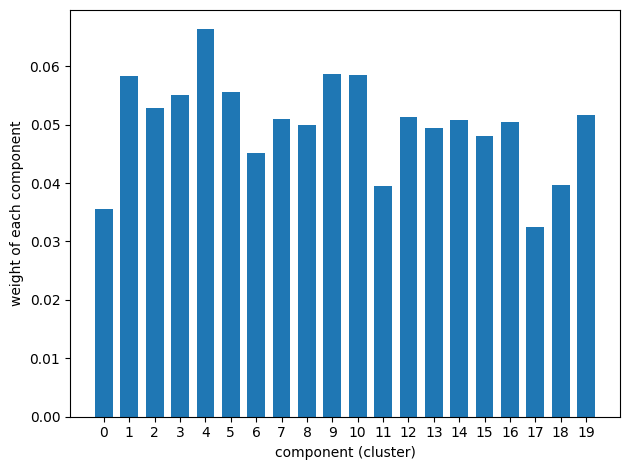

In [10]:
dt = datetime.datetime.now()
nc = 20
max_iter = 500

clustering_type = f'vbgmm_pca_{num_use_features}_{nc}clusters'
print(clustering_type)

vbgmm_train_pca = BayesianGaussianMixture(
    n_components=nc,
    max_iter=500,
    n_init=10,
    init_params="k-means++",

    verbose=1,
    verbose_interval=50,
    random_state=42,
)
y_train_pca = vbgmm_train_pca.fit_predict(X_train_pca[:,:num_use_features])

# vbgmm_train_pca: BayesianGaussianMixture = joblib.load("/workdir/notebooks/vbgmm_train_pca.pkl")
# y_train_pca = vbgmm_train_pca.predict(X_train_pca[:,:num_use_features])

model_save_dir = model_save_pardir / trained_datetime

if not model_save_dir.exists():
    os.makedirs(model_save_dir)
joblib.dump(vbgmm_train_pca, model_save_dir / f"{clustering_type}_iter{max_iter}.pkl")

rank_of_cluster_train_pca = rankdata(np.histogram(y_train_pca, bins=nc, range=(0, nc))[0], method='ordinal')
y_train_pca_sorted_cluster = rank_of_cluster_train_pca[y_train_pca]


# plt.subplot(4, 1, 4)
x_tick = np.arange(0, nc)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(x_tick, vbgmm_train_pca.weights_, width=0.7, tick_label=x_tick)
ax.set_xlabel('component (cluster)')
ax.set_ylabel('weight of each component')
fig.tight_layout()
plt.show()


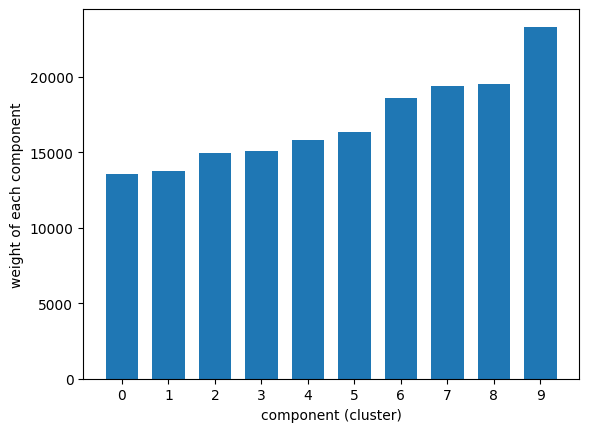

In [25]:
hist, bin_edges = np.histogram(y_train_pca_sorted_cluster)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, hist, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()


In [26]:
feature_pardir


PosixPath('/home/shinsei/MyResearches/feat_extrc/reports/features/SimpleCAE16/2023-11-27/12-07-16')

In [27]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_train_clustering = df_train.with_columns(
    [make_file_path_col, pl.Series("cluster", y_train_pca_sorted_cluster-1)]
)
df_train_clustering.write_csv(feature_pardir / f"feature_train_data_clustering_VBGMM_iter{max_iter}.csv")


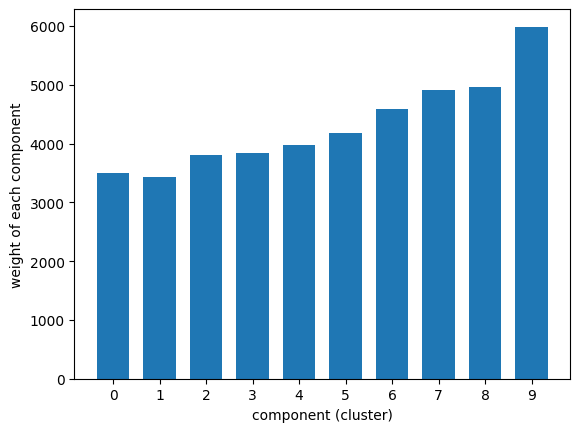

In [28]:
y_check_pca = vbgmm_train_pca.predict(X_check_pca[:, :num_use_features])
y_check_pca_sorted_cluster = rank_of_cluster_train_pca[y_check_pca]

hist, bin_edges = np.histogram(y_check_pca_sorted_cluster)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, hist, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()


In [29]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_check_clustering = df_check.with_columns(
    [make_file_path_col, pl.Series("cluster", y_check_pca_sorted_cluster-1)]
)
df_check_clustering.write_csv(feature_pardir / f"feature_check_data_clustering_VBGMM_iter{max_iter}.csv")


In [23]:
figure_pardir


PosixPath('/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-01-31/12-54-00')

In [53]:
rank_of_cluster_train_pca


array([ 1, 10,  8,  6,  3,  4,  5,  7,  9,  2])

max_abs_range=16.268626574593476


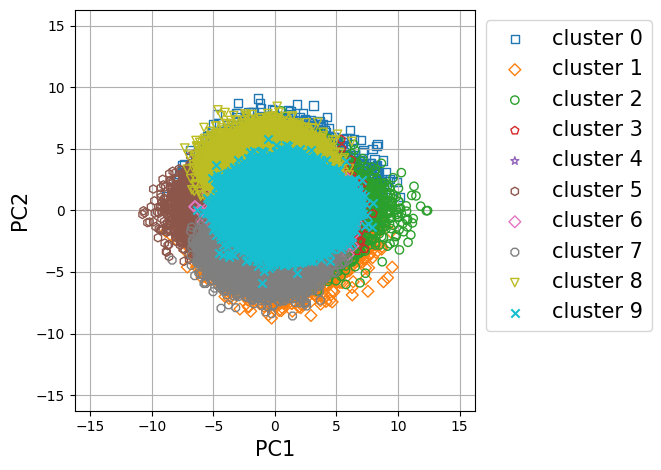

In [58]:
# df_train_clustering = pl.read_csv("/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_train_data_clustering.csv")
# # scatter_data = df_train_clustering.select([pl.exclude(["dirname", "filename", "filepath", "cluster"])]).to_numpy()
# cluster_labels = df_train_clustering.select(pl.col("cluster")).to_numpy().flatten()
scatter_save_path = figure_pardir / f"cluster_images_iter{max_iter}"
if not scatter_save_path.exists():
    scatter_save_path.mkdir(parents=True)

scatter_each_classes(
    X_train_pca,
    # cluster_labels,
    class_labels=y_train_pca_sorted_cluster-1,
    rank=np.arange(0, 10),
    # y_train_pca,

    markers=markers,
    colors=colors,
    xylabel=("PC1", "PC2"),
    face_color="None",
    fontsize=15,
    # path=scatter_save_path,
    # path="../reports/figures/VBGMM/2023-07-14/cluster_images/scatter.png"
    # path = figure_pardir / f"cluster_images_iter{max_iter}" / f"scatter_iter{max_iter}.png"
)


In [32]:
figure_pardir


PosixPath('/home/shinsei/MyResearches/feat_extrc/reports/figures/VBGMM/2023-11-27/12-07-16')

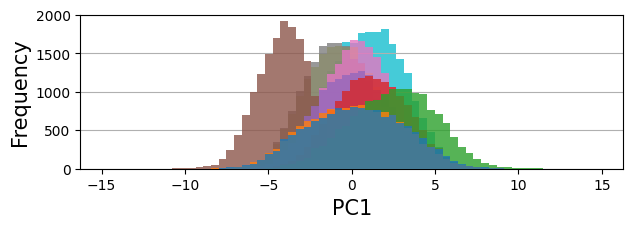

In [61]:
x_min = -16.268626574593476
x_max = 16.268626574593476
fontsize = 15

df_pc1 = pl.DataFrame(X_train_pca[:,0]).with_columns(
    df_train_clustering.select([pl.col("cluster")])
)

min_max = df_pc1.select(
    pl.col("column_0")
).describe().filter(
    (pl.col("describe") == "max" ) |
    (pl.col("describe") == "min" )
).select(
    pl.col("column_0")
).to_numpy().flatten()

fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1,1,1)

for i in range(10):
    pc1 = df_pc1.filter(
        pl.col("cluster") == i
    ).select("column_0").to_numpy().flatten()

    ax.hist(pc1, bins=50, range=min_max, alpha=0.8, label=f"cluster_{i}", zorder=10-i)
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 2000)

ax.set_xlabel("PC1", fontsize=fontsize)
ax.set_ylabel("Frequency", fontsize=fontsize)
ax.grid(axis="y")

fig.savefig(
    fname=figure_pardir / f"cluster_images_iter{max_iter}" / "frequency_pc1.png",
    dpi=fig.get_dpi(),
    bbox_inches="tight"
)


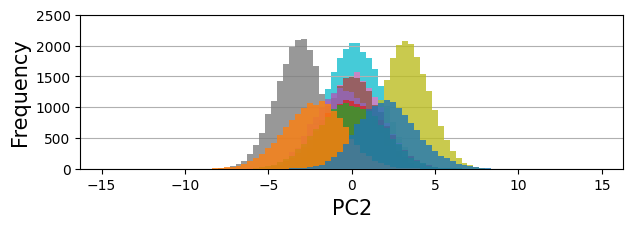

In [60]:
df_pc2 = pl.DataFrame(X_train_pca[:,1]).with_columns(
    df_train_clustering.select([pl.col("cluster")])
)

min_max = df_pc2.select(
    pl.col("column_0")
).describe().filter(
    (pl.col("describe") == "max" ) |
    (pl.col("describe") == "min" )
).select(
    pl.col("column_0")
).to_numpy().flatten()

fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1,1,1)

for i in range(10):
    pc1 = df_pc2.filter(
        pl.col("cluster") == i
    ).select("column_0").to_numpy().flatten()

    ax.hist(pc1, bins=50, range=min_max, alpha=0.8, label=f"cluster_{i}", zorder=10-i)
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 2500)

ax.set_xlabel("PC2", fontsize=fontsize)
ax.set_ylabel("Frequency", fontsize=fontsize)
ax.grid(axis="y")
fig.savefig(
    fname=figure_pardir / f"cluster_images_iter{max_iter}" / "frequency_pc2.png",
    dpi=fig.get_dpi(),
    bbox_inches="tight"
)


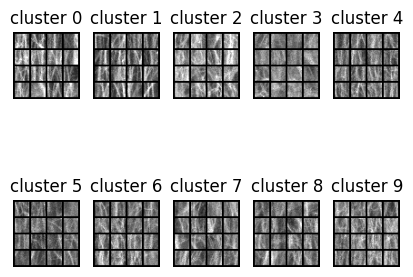

In [37]:
concatenated_images, used_images = image_concat_and_imshow(df_train_clustering, labels=np.arange(0,10), col_row=(4,4), image_root=image_pardir)
concatenated_images_path = figure_pardir / f"cluster_images_iter{max_iter}" / "4x4"
if not concatenated_images_path.exists():
    concatenated_images_path.mkdir()

# for i, img in enumerate(concatenated_images):
#     img.save(figure_pardir / f"cluster_images_iter{max_iter}" / "4x4" / f"cluster{i}.png")


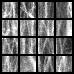

In [42]:
concatenated_images[0]


In [46]:
used_images.select("filepath")[0]


filepath
str
"""1/10k_1_h040_w…"


In [9]:
X_train.shape[1]


128

In [12]:
X_check_std.shape


(43200, 128)

vbgmm_std_128_10clusters
Initialization 0
  Iteration 100
  Iteration 200
  Iteration 300
  Iteration 400
  Iteration 500
  Iteration 600
  Iteration 700
  Iteration 800
  Iteration 900
  Iteration 1000
Initialization converged: False


/home/shinsei/MyResearches/feat_extrc/.venv/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


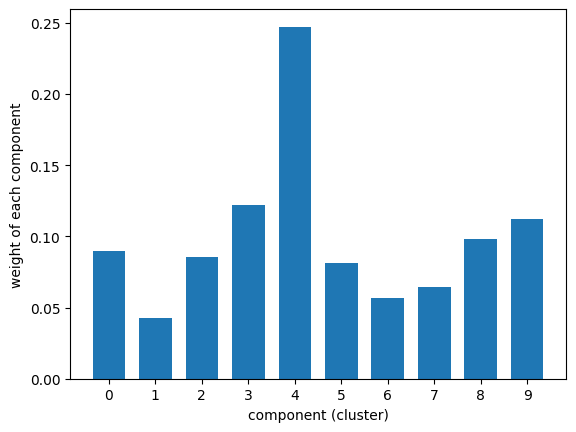

In [13]:
dt = datetime.datetime.now()

nc = 10

num_features = X_train.shape[1]
clustering_type = f'vbgmm_std_{num_features}_{nc}clusters'
print(clustering_type)

hparams = {
    "n_components": nc,
    "max_iter": 1000,
    # "n_init": 10,
    "init_params": "k-means++",

    "random_state": 42,
    "verbose": 1,
    "verbose_interval": 100,
}

# vbgmm_train_std_128_10 = BayesianGaussianMixture(
#     n_components=nc,
#     max_iter=1000,
#     n_init=10,
#     init_params="k-means++",
#     verbose=1
# )
vbgmm_train_std = BayesianGaussianMixture(**hparams)
y_train_std = vbgmm_train_std.fit_predict(X_check_std)

# model_save_dir = model_save_pardir / dt.strftime("%Y-%m-%d/%H-%M-%S")
model_save_dir = model_save_pardir / trained_datetime
if not model_save_dir.exists():
    os.makedirs(model_save_dir)
joblib.dump(vbgmm_train_std, model_save_dir / f"vbgmm_train_std_{num_features}_{nc}.pkl")

rank_of_cluster_train_std = rankdata(- vbgmm_train_std.weights_, method='ordinal')
y_train_std_sorted_cluster = rank_of_cluster_train_std[y_train_std]

# plt.subplot(4, 1, 4)
x_tick = np.arange(0, nc)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, vbgmm_train_std.weights_, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()


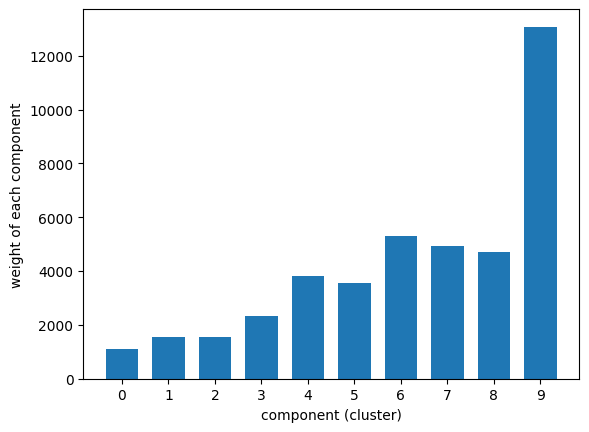

In [15]:
hist, bin_edges = np.histogram(y_train_std_sorted_cluster)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.bar(x_tick, hist, width=0.7, tick_label=x_tick)
plt.xlabel('component (cluster)')
plt.ylabel('weight of each component')
plt.show()


In [18]:
model_save_dir


PosixPath('/home/shinsei/MyResearchs/feat_extrc/models/VBGMM/2023-07-10/13-09-32')

In [19]:
y_train_std = vbgmm_train_std_128_10.predict(X_train_std)
y_check_std = vbgmm_train_std_128_10.predict(X_check_std)

rank_of_cluster_train_std = rankdata(np.histogram(y_train_std)[0], method='ordinal')
y_train_std_sorted_cluster = rank_of_cluster_train_std[y_train_std]
y_check_std_sorted_cluster = rank_of_cluster_train_std[y_check_std]


max_abs_range=7.207655254352059


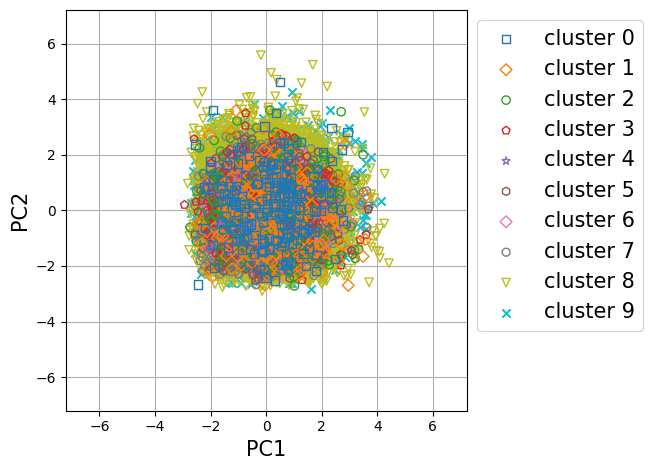

In [20]:
scatter_each_classes(
    X_train_std,
    # cluster_labels,
    y_train_std_sorted_cluster-1,
    np.arange(0, 10)[::-1],
    markers,
    colors,
    xylabel=("PC1", "PC2"),
    face_color="None",
    fontsize=15,
#     path="../reports/figures/VBGMM/2023-07-50/cluster_images/scatter.png"
)


In [19]:
feature_pardir


PosixPath('/home/shinsei/MyResearchs/feat_extrc/reports/features/SimpleCVAE_softplus32/2023-07-18/19-08-34')

In [20]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_check_clustering = df_check.with_columns(
    [make_file_path_col, pl.Series("cluster", y_check_std_sorted_cluster-1)]
)
df_check_clustering.write_csv(feature_pardir / "feature_check_data_clustering.csv")
df_check_clustering.head()


column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,dirname,filename,filepath,cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
0.371207,0.773912,0.321,0.97179,0.467441,-0.794627,0.155872,-0.429781,-0.62078,0.092581,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.466664,0.800218,0.09891,-0.229312,0.719136,-0.84856,1.146627,0.535144,0.163504,-0.539297,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.139828,-0.057409,-0.205014,-0.360194,0.178539,-0.288145,0.027653,-0.986673,-0.295563,-0.346313,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
0.108137,0.61107,-0.408147,0.128743,0.614519,-1.381092,-0.371074,0.507027,0.002102,0.196136,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.846178,-0.870254,-0.509567,0.478472,-0.679784,0.488236,-0.023896,0.480033,0.004727,-1.526124,0,"""10k_0_h000_w01…","""0/10k_0_h000_w…",9


In [21]:
make_file_path_col = pl.concat_str([pl.col("dirname"), pl.col("filename")], separator="/").alias("filepath")
df_train_clustering = df_train.with_columns(
    [make_file_path_col, pl.Series("cluster", y_train_std_sorted_cluster-1)]
)
df_train_clustering.write_csv(feature_pardir / "feature_train_data_clustering.csv")
df_train_clustering.head()


column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,dirname,filename,filepath,cluster
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,i64
0.38649,0.75855,0.388386,1.012816,0.467618,-0.800058,0.161129,-0.432032,-0.632134,0.08859,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.193307,0.355739,0.189834,-0.427002,-0.923228,-1.006827,0.641109,-0.609367,0.176206,-0.414809,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9
-0.460056,0.780828,0.160261,-0.182374,0.721669,-0.856519,1.162508,0.54174,0.159463,-0.551491,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.16748,0.247725,-0.5245,-0.092569,0.035326,-0.131247,1.267444,-0.21511,-0.503101,-0.181691,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",7
0.149339,-0.07854,-0.121354,-0.315032,0.185015,-0.295195,0.033236,-0.989271,-0.296639,-0.360667,0,"""10k_0_h000_w00…","""0/10k_0_h000_w…",9


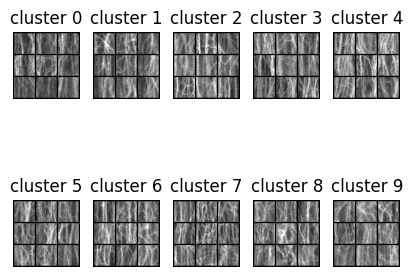

In [25]:
concatenated_images = image_concat_and_imshow(df_train_clustering, labels=np.arange(0,10), colrow=(3,3), image_root=image_pardir)
for i, img in enumerate(concatenated_images):
    img.save(f"/home/shinsei/MyResearchs/feat_extrc/reports/figures/VBGMM/2023-07-18/cluster_images/3x3/cluster{i}.png")
